### import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
# sklearn - scikit learn

### create UDFs

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary( x ):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

In [6]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### import data

In [4]:
cars = pd.read_csv('C:/Users/jmd/Desktop/LALIT/(4) Python for Data Science/CLASS 16/Car_sales.csv')
cars

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


### data inspection

In [8]:
cars.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [10]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [11]:
cars.nunique()

Manufacturer               30
Model                     156
Sales_in_thousands        157
four_year_resale_value    117
Vehicle_type                2
Price_in_thousands        152
Engine_size                31
Horsepower                 66
Wheelbase                  88
Width                      78
Length                    127
Curb_weight               147
Fuel_capacity              55
Fuel_efficiency            20
Latest_Launch             130
Power_perf_factor         154
dtype: int64

In [12]:
cars.Vehicle_type.value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [14]:
# seperate categorical and continuous variables
cars_conti_vars = cars.loc[:, (cars.dtypes == 'float64') | (cars.dtypes == 'int64')]
cars_cat_vars = cars.loc[:, (cars.dtypes == 'object')]


In [15]:
cars_conti_vars.head(1)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.36,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.28015


In [16]:
# alternate of .describe() for continuous variables
cars_conti_vars.apply( continuous_var_summary ).round(1)

# cars_conti_vars.apply( lambda x: continuous_var_summary(x)).round(1)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.0,121.0,155.0,156.0,156.0,156.0,156.0,156.0,155.0,156.0,154.0,155.0
NMISS,0.0,36.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0
SUM,8320.7,2186.8,4245.6,477.5,29008.0,16768.0,11099.4,29225.6,523.6,2800.5,3672.0,11941.8
MEAN,53.0,18.1,27.4,3.1,185.9,107.5,71.1,187.3,3.4,18.0,23.8,77.0
MEDIAN,29.4,14.2,22.8,3.0,177.5,107.0,70.6,187.9,3.3,17.2,24.0,72.0
STD,68.0,11.5,14.4,1.0,56.7,7.6,3.5,13.4,0.6,3.9,4.3,25.1
VAR,4628.0,131.2,206.0,1.1,3214.9,58.4,11.9,180.4,0.4,15.1,18.3,632.2
MIN,0.1,5.2,9.2,1.0,55.0,92.6,62.6,149.4,1.9,10.3,15.0,23.3
P1,0.9,6.2,10.2,1.6,96.4,92.9,66.1,154.9,2.2,11.9,15.0,38.5
P5,1.9,7.8,12.5,1.8,114.5,95.9,66.5,163.7,2.4,12.5,16.6,46.2


In [17]:
# alter of .describe() for categorical variables
cars_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Manufacturer,157,0,Dodge,11,7.01
Model,157,0,Neon,2,1.27
Vehicle_type,157,0,Passenger,116,73.89
Latest_Launch,157,0,10/30/2012,2,1.27


### outlier treatment

In [18]:
cars_conti_vars = cars_conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01),
                                                         upper = x.quantile(0.99)))

In [19]:
cars_conti_vars.apply(continuous_var_summary).round(1)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.0,121.0,155.0,156.0,156.0,156.0,156.0,156.0,155.0,156.0,154.0,155.0
NMISS,0.0,36.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0
SUM,8025.5,2180.4,4236.0,475.8,28910.3,16760.1,11102.4,29223.9,523.8,2799.9,3660.0,11911.7
MEAN,51.1,18.0,27.3,3.1,185.3,107.4,71.2,187.3,3.4,17.9,23.8,76.8
MEDIAN,29.4,14.2,22.8,3.0,177.5,107.0,70.6,187.9,3.3,17.2,24.0,72.0
STD,57.7,11.2,14.1,1.0,52.8,7.4,3.4,13.1,0.6,3.8,4.0,23.8
VAR,3331.9,125.0,197.8,1.0,2789.6,55.1,11.5,172.1,0.4,14.6,16.0,568.6
MIN,0.9,6.2,10.2,1.6,96.4,92.9,66.1,154.9,2.2,11.9,15.0,38.5
P1,0.9,6.4,10.5,1.6,98.4,93.0,66.3,156.2,2.2,11.9,15.0,39.3
P5,1.9,7.8,12.5,1.8,114.5,95.9,66.5,163.7,2.4,12.5,16.6,46.2


### missing value treatment

In [20]:
cars_conti_vars.isna().sum() * 100 / cars_conti_vars.isna().count()

Sales_in_thousands         0.000000
four_year_resale_value    22.929936
Price_in_thousands         1.273885
Engine_size                0.636943
Horsepower                 0.636943
Wheelbase                  0.636943
Width                      0.636943
Length                     0.636943
Curb_weight                1.273885
Fuel_capacity              0.636943
Fuel_efficiency            1.910828
Power_perf_factor          1.273885
dtype: float64

In [21]:
cars_conti_vars = cars_conti_vars.apply(missing_imputation)
cars_cat_vars = cars_cat_vars.apply(missing_imputation)

In [22]:
cars_conti_vars.apply(continuous_var_summary).round(1)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0
NMISS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SUM,8025.5,2829.1,4290.6,478.9,29095.6,16867.5,11173.6,29411.3,530.5,2817.8,3731.3,12065.4
MEAN,51.1,18.0,27.3,3.1,185.3,107.4,71.2,187.3,3.4,17.9,23.8,76.8
MEDIAN,29.4,17.7,23.4,3.0,180.0,107.0,70.6,187.8,3.4,17.2,24.0,72.3
STD,57.7,9.8,14.0,1.0,52.6,7.4,3.4,13.1,0.6,3.8,4.0,23.7
VAR,3331.9,96.2,195.3,1.0,2771.7,54.8,11.4,171.0,0.4,14.5,15.7,561.3
MIN,0.9,6.2,10.2,1.6,96.4,92.9,66.1,154.9,2.2,11.9,15.0,38.5
P1,0.9,6.9,10.5,1.6,98.4,93.0,66.3,156.3,2.2,11.9,15.0,39.3
P5,1.9,8.4,12.5,1.8,114.6,95.9,66.5,163.7,2.4,12.5,16.8,46.3


In [23]:
# get the count of all the categories of the variable
cars_cat_vars.Manufacturer.value_counts()

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Chrysler       7
Mitsubishi     7
Nissan         7
Mercury        6
Pontiac        6
Volvo          6
Volkswagen     6
Lexus          6
Oldsmobile     6
Honda          5
Cadillac       5
Saturn         5
Buick          4
Plymouth       4
Acura          4
Porsche        3
Lincoln        3
Audi           3
Hyundai        3
Jeep           3
BMW            3
Subaru         2
Saab           2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [24]:
cars_cat_vars.Vehicle_type.value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [25]:
pd.get_dummies( cars_cat_vars.Vehicle_type, drop_first = True, prefix = 'Vehicle_type' )

,Vehicle_type_Passenger
0,1
1,1
2,1
3,1
4,1
...,...
152,1
153,1
154,1
155,1


In [26]:
# get the useful categorical variables
cars_cat_vars = cars.loc[:, ['Manufacturer', 'Vehicle_type']]

# for c_feature in categorical_features
for c_feature in cars_cat_vars.columns:
    
    cars_cat_vars.loc[:, c_feature] = cars_cat_vars[c_feature].astype('category')
    
    cars_cat_vars = create_dummies(cars_cat_vars, c_feature)

In [27]:
cars_cat_vars

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [28]:
cars_cat_vars.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

In [29]:
cars_cat_vars.rename( columns = {'Manufacturer_Mercedes-B' : 'Manufacturer_Mercedes_B'}, inplace = True)

In [30]:
cars_cat_vars.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

### final data for analysis

In [31]:
cars_new = pd.concat([cars_conti_vars, cars_cat_vars], axis = 1)

In [32]:
cars_new.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


In [33]:
cars_new.shape

(157, 42)

### assumptions check

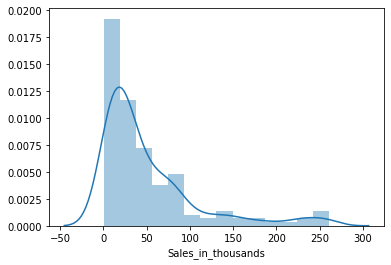

In [34]:
# Distribution of variables
sns.distplot(cars_new.Sales_in_thousands)
plt.show()
# this distribution is highly skewed

In [35]:
cars_new.Sales_in_thousands.skew()

1.9924932920508793

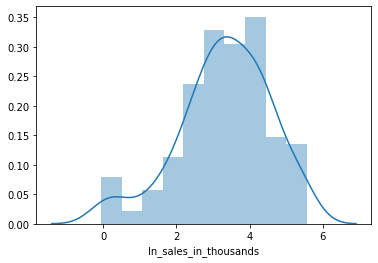

In [36]:
# apply log transformation: log is rescalling the data and making the distribution normal
cars_new.loc[:, 'ln_sales_in_thousands'] = np.log(cars_new.loc[:, 'Sales_in_thousands'])

# Distribution of variables
sns.distplot(cars_new.ln_sales_in_thousands)
plt.show()

In [37]:
cars_new.ln_sales_in_thousands.skew()

-0.5925861100519006

In [38]:
# Linearity: correlation matrix (ranges from 1 to -1)
corrm = cars_new.corr()
corrm.to_excel('corrm.xlsx')
corrm

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
Sales_in_thousands,1.000000,-3.075381e-01,-0.361572,-0.014342,-0.259311,0.278280,0.093054,0.200997,-0.035282,0.044446,...,0.036853,-0.114192,-7.988584e-02,-0.054683,-2.181588e-02,0.133404,-0.056294,-1.333610e-01,-0.230252,0.799513
four_year_resale_value,-0.307538,1.000000e+00,0.832320,0.440258,0.679605,-0.037624,0.158211,0.025517,0.304378,0.284274,...,-0.071303,0.512245,4.484484e-17,-0.087128,5.774589e-17,-0.030552,-0.062450,2.124397e-16,0.076638,-0.479350
Price_in_thousands,-0.361572,8.323203e-01,1.000000,0.618230,0.849851,0.118080,0.328107,0.158161,0.527230,0.430942,...,-0.062676,0.352160,1.860392e-02,-0.170025,-4.839044e-02,-0.094643,-0.137820,5.158511e-02,0.042006,-0.578170
Engine_size,-0.014342,4.402582e-01,0.618230,1.000000,0.815010,0.518423,0.702618,0.576386,0.793937,0.698341,...,0.078278,0.016675,-1.047543e-01,-0.191415,-6.401942e-02,-0.108099,-0.221271,-1.531916e-01,-0.279272,-0.120983
Horsepower,-0.259311,6.796053e-01,0.849851,0.815010,1.000000,0.325247,0.538115,0.420472,0.637823,0.526554,...,-0.001225,0.231413,-1.693190e-02,-0.227139,-4.398854e-02,-0.115857,-0.244956,-1.198690e-02,-0.011910,-0.400528
Wheelbase,0.278280,-3.762379e-02,0.118080,0.518423,0.325247,1.000000,0.681402,0.837566,0.657133,0.659706,...,0.046301,-0.260846,-4.521823e-02,-0.083508,-9.218360e-02,-0.094079,-0.203652,-8.565596e-02,-0.383084,0.270203
Width,0.093054,1.582115e-01,0.328107,0.702618,0.538115,0.681402,1.000000,0.700153,0.710589,0.648557,...,0.042237,-0.060887,-7.315767e-02,-0.200799,-1.102499e-01,-0.115710,-0.187554,-9.484845e-02,-0.241472,0.038309
Length,0.200997,2.551744e-02,0.158161,0.576386,0.420472,0.837566,0.700153,1.000000,0.622789,0.561884,...,0.096592,-0.149884,-1.422854e-02,-0.061395,-5.953822e-02,-0.103610,-0.304533,-5.911793e-02,-0.129701,0.207226
Curb_weight,-0.035282,3.043781e-01,0.527230,0.793937,0.637823,0.657133,0.710589,0.622789,1.000000,0.868131,...,0.007662,-0.094627,-4.503929e-02,-0.221474,-2.013658e-02,-0.070768,-0.161960,-3.058882e-02,-0.519405,-0.051904
Fuel_capacity,0.044446,2.842737e-01,0.430942,0.698341,0.526554,0.659706,0.648557,0.561884,0.868131,1.000000,...,-0.001650,-0.034864,-7.424594e-03,-0.260342,-4.633177e-02,-0.011787,-0.170589,-6.026328e-03,-0.594758,-0.019549


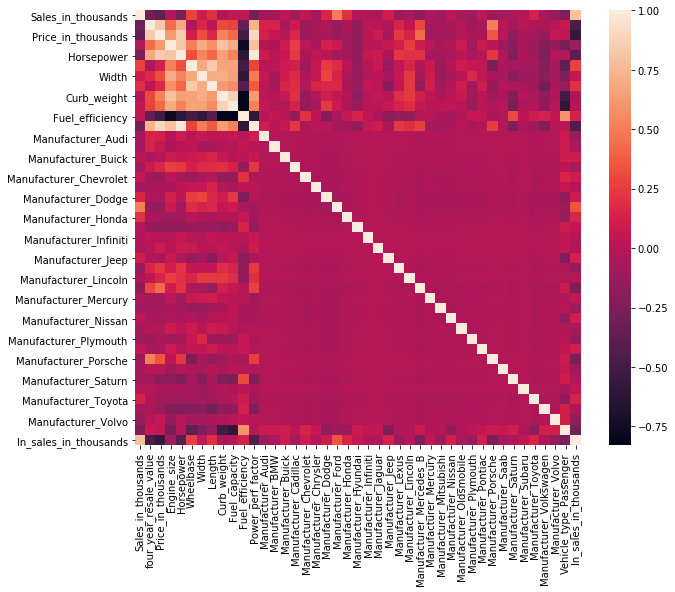

In [39]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cars_new.corr())

# fuel efficiency vs fuel capacity
# Curb weight vs Engine Size

In [40]:
# no of variables and obs in the final data to be used for modelling
cars_new.shape

(157, 43)

### feature selection based on importance using F - Regression

In [74]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [75]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
feature_columns = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [76]:
len(feature_columns)

41

In [79]:
# seperate the X and y columns
features = cars_new[feature_columns]
target = cars_new.ln_sales_in_thousands

# do the f_regression
F_values, p_values  = f_regression( features, target )

In [86]:
pd.concat( [ pd.Series(feature_columns), 
                    pd.Series(F_values).round(2), 
                        pd.Series(p_values).round(4) ], axis = 1 )

,0,1,2
0,Curb_weight,0.42,0.5185
1,Engine_size,2.30,0.1312
2,Fuel_capacity,0.06,0.8080
3,Fuel_efficiency,2.88,0.0918
4,Horsepower,29.62,0.0000
5,Length,6.95,0.0092
6,Manufacturer_Audi,2.87,0.0920
7,Manufacturer_BMW,0.73,0.3953
8,Manufacturer_Buick,1.20,0.2758
9,Manufacturer_Cadillac,0.89,0.3475


In [85]:
pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T

,0,1,2
0,Curb_weight,0.42,0.5185
1,Engine_size,2.3,0.1312
2,Fuel_capacity,0.06,0.808
3,Fuel_efficiency,2.88,0.0918
4,Horsepower,29.62,0.0
5,Length,6.95,0.0092
6,Manufacturer_Audi,2.87,0.092
7,Manufacturer_BMW,0.73,0.3953
8,Manufacturer_Buick,1.2,0.2758
9,Manufacturer_Cadillac,0.89,0.3475


In [87]:
# combine the output in dataframe
F_regression_op = pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values' ]

In [88]:
F_regression_op

,Features,F_values,p_values
0,Curb_weight,0.42,0.5185
1,Engine_size,2.3,0.1312
2,Fuel_capacity,0.06,0.808
3,Fuel_efficiency,2.88,0.0918
4,Horsepower,29.62,0.0
5,Length,6.95,0.0092
6,Manufacturer_Audi,2.87,0.092
7,Manufacturer_BMW,0.73,0.3953
8,Manufacturer_Buick,1.2,0.2758
9,Manufacturer_Cadillac,0.89,0.3475


In [89]:
# output of the f_regression
feature_columns = list( F_regression_op.loc[ F_regression_op.p_values <= 0.1, 'Features' ] )
# (we are subsetting and filtering out insignificant variables)

In [90]:
feature_columns # (here in feature column are the variables that are significant and can impact my Y variable)

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

####  VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [94]:
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [92]:
feature_columns

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

In [93]:
model_param = 'ln_sales_in_thousands ~ ' + ' + '.join(feature_columns)
model_param

'ln_sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [104]:
model_param = '''ln_sales_in_thousands ~ Fuel_efficiency + Length + 
        Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + 
        Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + 
        Price_in_thousands + Vehicle_type_Passenger'''

In [105]:
# separate the Y and X variables
y, X = dmatrices( model_param, cars_new, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,568.6
1,Fuel_efficiency,4.0
2,Length,1.4
3,Manufacturer_Audi,1.1
4,Manufacturer_Ford,1.1
5,Manufacturer_Honda,1.1
6,Manufacturer_Mercedes_B,1.6
7,Manufacturer_Plymouth,1.0
8,Manufacturer_Porsche,1.4
9,Manufacturer_Toyota,1.2


In [106]:
# output of the VIF
feature_columns = list( set(vif.loc[:, 'Features']).difference(['Intercept']) )

In [107]:
feature_columns

['Fuel_efficiency',
 'Length',
 'Manufacturer_Mercedes_B',
 'Price_in_thousands',
 'Manufacturer_Plymouth',
 'Vehicle_type_Passenger',
 'Manufacturer_Porsche',
 'Manufacturer_Audi',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Manufacturer_Honda',
 'Manufacturer_Ford']

### split the data for model building

In [108]:
train_X, test_X, train_y, test_y = train_test_split(cars_new[feature_columns], 
                        cars_new['ln_sales_in_thousands'], test_size = 0.3, random_state = 12345)

In [109]:
# method 2: divide the data into training and testing
train, test = train_test_split(cars_new, test_size = 0.3, random_state = 12345)

In [110]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  109  |  No of obs in testing:  48


### building a linear regression model

## model 0

In [48]:
m0_equation = '''ln_sales_in_thousands ~ Vehicle_type_Passenger + 
                Manufacturer_Ford + 
                Fuel_efficiency + 
                Length + Price_in_thousands'''

In [111]:
feature_columns

['Fuel_efficiency',
 'Length',
 'Manufacturer_Mercedes_B',
 'Price_in_thousands',
 'Manufacturer_Plymouth',
 'Vehicle_type_Passenger',
 'Manufacturer_Porsche',
 'Manufacturer_Audi',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Manufacturer_Honda',
 'Manufacturer_Ford']

In [112]:
m1_equation = 'ln_sales_in_thousands ~ ' + ' + '.join(feature_columns)

In [124]:
m1_equation = '''ln_sales_in_thousands ~ Fuel_efficiency + Length + 
            Price_in_thousands + Vehicle_type_Passenger + 
            Manufacturer_Ford'''

m1_equation

'ln_sales_in_thousands ~ Fuel_efficiency + Length + \n            Price_in_thousands + Vehicle_type_Passenger + \n            Manufacturer_Ford'

In [125]:
lm0 = smf.ols( m1_equation, train ).fit()

In [126]:
print(lm0.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.526
Model:                               OLS   Adj. R-squared:                  0.503
Method:                    Least Squares   F-statistic:                     22.83
Date:                   Sat, 17 Apr 2021   Prob (F-statistic):           2.33e-15
Time:                           11:39:05   Log-Likelihood:                -139.86
No. Observations:                    109   AIC:                             291.7
Df Residuals:                        103   BIC:                             307.9
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Step 4: predict the sales on the training and testing data

In [54]:
# training
train.loc[:, 'pred_sales'] = np.exp(lm0.predict(train))

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [55]:
# testing/validation
test.loc[:, 'pred_sales'] = np.exp(lm0.predict(test))

In [56]:
train[['Sales_in_thousands', 'pred_sales']].mean()

Sales_in_thousands    51.427006
pred_sales            39.738783
dtype: float64

In [57]:
train[['Sales_in_thousands', 'pred_sales']].head()

,Sales_in_thousands,pred_sales
54,125.33800,113.777806
52,260.64532,110.204074
141,65.11900,65.530762
8,9.23100,9.523704
131,5.22300,46.485393


#### MSE - mean squared error

In [58]:
MSE_train = round(mean_squared_error( train.Sales_in_thousands, train.pred_sales ), 2)
MSE_test = round(mean_squared_error( test.Sales_in_thousands, test.pred_sales ), 2)

RMSE_train = round(np.sqrt( MSE_train ), 2)
RMSE_test = round(np.sqrt( MSE_test ), 2)

print('MSE of training data: ', MSE_train,  ' | ', 'MSE of testing data: ', MSE_test)
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

MSE of training data:  2455.25  |  MSE of testing data:  4302.98
RMSE of training data:  49.55  |  RMSE of testing data:  65.6


#### MAE - mean absolute error

In [59]:
MAE_train = round(mean_absolute_error( train.Sales_in_thousands, train.pred_sales ), 2)
MAE_test = round(mean_absolute_error( test.Sales_in_thousands, test.pred_sales ), 2)

print('MAE of training data: ', MAE_train,  ' | ', 'MAE of testing data: ', MAE_test)

MAE of training data:  28.89  |  MAE of testing data:  35.96


#### MAPE: Mean Absolute Percentage Error

In [60]:
# accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = np.mean(np.abs(train.Sales_in_thousands - train.pred_sales)/train.Sales_in_thousands)
MAPE_test = np.mean(np.abs(test.Sales_in_thousands - test.pred_sales)/test.Sales_in_thousands)

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  1.1335296252361071  |  MAPE of testing data:  0.7722052476912479


#### corelations

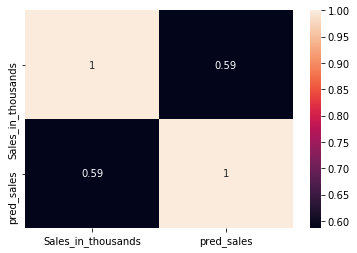

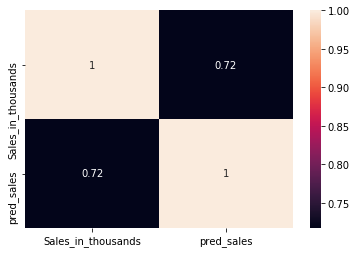

In [61]:
sns.heatmap(train[['Sales_in_thousands', 'pred_sales']].corr(), annot = True)
plt.show()
sns.heatmap(test[['Sales_in_thousands', 'pred_sales']].corr(), annot = True)
plt.show()

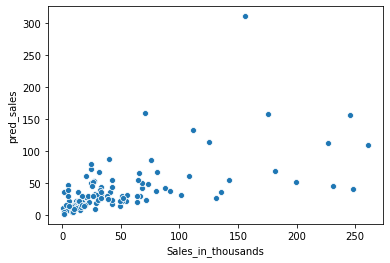

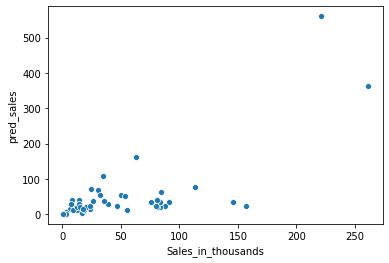

In [62]:
sns.scatterplot( train.Sales_in_thousands, train.pred_sales )
plt.show()
sns.scatterplot( test.Sales_in_thousands, test.pred_sales )
plt.show()